In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Base de Datos de Kaggle, para el analisis y modelo "Diabetes"

In [2]:
# IMPORTAMOS NUESTRO DATAFRAME DE DIABETES, RECORDAR QUE LA VARIABLE "RESULTADO" TIENE SI=1 Y NO=0
df = pd.read_csv(r"C:\Users\GUSTAVO\Desktop\GustavoALL\Cursos\01_ Bases de datos para Practicar\Diabetes\diabetes.csv")
df

,embarazos,glucosa,presionArterial,grosor_de_la_peil,insulina,BMI,FuncionPedigreeDiabetes,edad,resultado
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.describe()

,embarazos,glucosa,presionArterial,grosor_de_la_peil,insulina,BMI,FuncionPedigreeDiabetes,edad,resultado
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


1.- Es posible tenes Glucosa=0? Cual seria el valor minimo de este y su maximo que se puede presentar.
2.- Es posible tenes Presion Arterial=0? Cual seria el valor minimo de este y su maximo que se puede presentar.
3.- Es posible tenes Insulina=0? Cual seria el valor minimo de este y su maximo que se puede presentar.
4.- Es posible tenes IMC=0? Cual seria el valor minimo de este y su maximo que se puede presentar.

1- no es posible 0 : lo normal 70-100 mg/dl
2. No es posible 0: lo normal 80_120 
3. No es posible 0: 60 _ 100 mg/dl 
4. No es posible 0 lo ideal oscila entre 18.5 y 24.9 dentro de un peso normal varía un poco entre hombres y mujeres

**Limpiando el DataFrame**

Primeramente, nuestro Dataframe tiene valores de 0 en la columna Glucosa, lo cual es imposible tener, por lo que se eliminará estas filas.

In [4]:
df1 = df[ ( df["glucosa"]!=0)]
df1.shape

(763, 9)

Segundo, nuestro Dataframe tiene valores de 0 en la columna Presion arterial, lo cual es imposible tener, por lo que se eliminará estas filas.

In [5]:
df2 = df1[ ( df1["presionArterial"]!=0)]
df2.shape

(728, 9)

Segundo, nuestro Dataframe tiene valores de 0 en la columna Insulina, lo cual es imposible tener, por lo que se eliminará estas filas.

In [6]:
df3 = df2[ ( df2["insulina"]!=0)]
df3.shape

(393, 9)

Por ultimo limpiamos el IMC y el grosor de la piel, que no pueden ser iguales a 0

In [7]:
df4 = df3[ ( df3["BMI"]!=0)]
df5 = df4[ ( df4["grosor_de_la_peil"]!=0)]
df5.shape

(392, 9)

Y realizamos un cuadro con las estadisticas descriptivas de nuestro DataFrame

In [8]:
df5.describe()

,embarazos,glucosa,presionArterial,grosor_de_la_peil,insulina,BMI,FuncionPedigreeDiabetes,edad,resultado
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**COMENZAMOS CON EL ANALISIS DE NUESTRO DATAFRAME**

0    262
1    130
Name: resultado, dtype: int64
----------------------------------------------------------------------------------------------------


<function matplotlib.pyplot.show(close=None, block=None)>

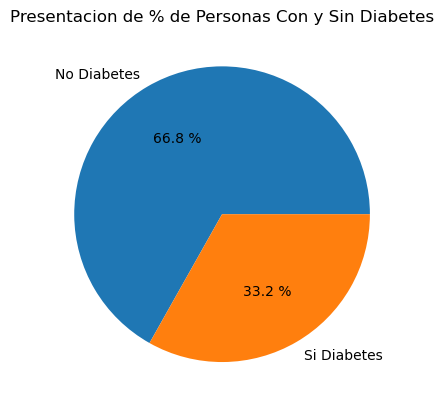

In [9]:
# NUMERO DE PERSONAS QUE TIENEN DIABETES EN NUESTRO DATAFRAME

personas_diabetes = df5["resultado"].value_counts()
print(personas_diabetes)
print("--"*50)
nombres=["No Diabetes", "Si Diabetes"]
plt.pie(personas_diabetes, labels=nombres, autopct="%0.1f %%")
plt.title('Presentacion de % de Personas Con y Sin Diabetes')
plt.show

A CONTINUACION OBTENEMOS LAS PERSONAS CON MAYOR Y MENOR IMC

In [10]:
# BMI O Indice de Masa Corporal IMC, es una razón matemática que asocia la masa y la talla de un individuo
#                  Si su IMC es entre 18.5 y 24.9, se encuentra dentro del rango de peso normal o saludable.
#                  Si su IMC es entre 25.0 y 29.9, se encuentra dentro del rango de sobrepeso.
#                  Si su IMC es 30.0 o superior, se encuentra dentro del rango de obesidad.
print("Las 10 personas con MAYOR IMC:\n",df5["BMI"].sort_values(ascending=False).head(10))
print("--"*50)
print("Las 10 personas con MENOR IMC:\n",df5["BMI"].sort_values(ascending=True).head(10))

Las 10 personas con MAYOR IMC:
 177    67.1
445    59.4
673    57.3
125    55.0
120    53.2
247    52.3
99     49.7
335    47.9
57     46.8
92     46.7
Name: BMI, dtype: float64
----------------------------------------------------------------------------------------------------
Las 10 personas con MENOR IMC:
 526    18.2
316    19.3
50     19.4
639    19.5
607    19.5
68     19.6
519    19.6
617    20.1
203    20.4
97     20.4
Name: BMI, dtype: float64


A CONTINUACION OBTENDREMOS TODAS LAS EDADES CON DIABETES

In [11]:

num_personas_diabetes = df4["edad"].where(df4["resultado"]==1)
#print(num_personas_diabetes)

num_personas_diabetes1 = df4["edad"].where(df4["resultado"]==1).value_counts()
#print(num_personas_diabetes1)

# continuando... crearemos un dataframe de la anterior variable para su mejor trabajo
num_personas_diabetes2 = pd.DataFrame({
    "Edad":num_personas_diabetes1.index, "Cantidad": num_personas_diabetes1.values
})
#num_personas_diabetes2.head(5) #solo mostramos las 5 primeras filas
num_personas_diabetes2["Porcentaje"] = (num_personas_diabetes2["Cantidad"].values/130)*100
num_personas_diabetes2

,Edad,Cantidad,Porcentaje
0,25.0,9,6.923077
1,29.0,8,6.153846
2,31.0,7,5.384615
3,43.0,7,5.384615
4,33.0,7,5.384615
5,28.0,7,5.384615
6,24.0,6,4.615385
7,51.0,5,3.846154
8,36.0,5,3.846154
9,26.0,5,3.846154


A CONTINUACION OBETENEMOS LAS EDAD DE LAS PERSONAS QUE NO TENGAN DIABETES

In [12]:

num_personas_nodiabetes = df5["edad"].where(df5["resultado"]==0)
#print(num_personas_diabetes)

num_personas_nodiabetes1 = df5["edad"].where(df5["resultado"]==0).value_counts()
#print(num_personas_diabetes1)

# continuando... crearemos un dataframe de la anterior variable para su mejor trabajo
num_personas_nodiabetes2 = pd.DataFrame({
    "Edad":num_personas_nodiabetes1.index, "Cantidad": num_personas_nodiabetes1.values
})
#num_personas_diabetes2.head(5) #solo mostramos las 5 primeras filas
num_personas_nodiabetes2["Porcentaje"] = (num_personas_nodiabetes2["Cantidad"].values/262)*100
num_personas_nodiabetes2

,Edad,Cantidad,Porcentaje
0,22.0,38,14.503817
1,21.0,31,11.832061
2,24.0,25,9.541985
3,23.0,25,9.541985
4,25.0,21,8.015267
5,26.0,19,7.251908
6,28.0,14,5.343511
7,27.0,11,4.198473
8,30.0,7,2.671756
9,34.0,6,2.290076


In [13]:
df5.groupby(["resultado"]).mean()["embarazos"]

resultado
0    2.721374
1    4.469231
Name: embarazos, dtype: float64

El resultado de tener diabetes con respecto al promedio de embarazos, es de casi 2 embarazos más de las muejres que no lo tienen diabetes.

In [14]:
df5.groupby(["resultado"]).mean()["insulina"]

resultado
0    130.854962
1    206.846154
Name: insulina, dtype: float64

Los niveles de insulina en personas con diabetes, es en promedio mas de 70 mg/dl que las personas que no tienen diabetes.

In [15]:
df5.groupby(["resultado"]).mean()["glucosa"]

resultado
0    111.431298
1    145.192308
Name: glucosa, dtype: float64

De igual manera, se observa que las personas con Diabetes tienen mayores niveles de glucosa en promedio que las personas que no tienen diabetes.

In [16]:
df5.groupby(["resultado"]).mean()["presionArterial"]

resultado
0    68.969466
1    74.076923
Name: presionArterial, dtype: float64

Por otro lado, la personas con mayor Presión Arterial en promedio, tienden a tener diabetes.

In [17]:
df5.groupby(["resultado"]).mean()["BMI"]

resultado
0    31.750763
1    35.777692
Name: BMI, dtype: float64

Las personas que presentan un mayor Grosor de la Piel, son más probables a tener diabetes en promedio.

Cabe destacar que segun estudios medicos, son resultados esperados en personas que presentan Diabetes, ya sea por la edad, el nivel de insulina, glucosa, presión arterial, BMI o hasta el número de embarazos.

array([[<AxesSubplot:title={'center':'embarazos'}>,
        <AxesSubplot:title={'center':'glucosa'}>,
        <AxesSubplot:title={'center':'presionArterial'}>],
       [<AxesSubplot:title={'center':'grosor_de_la_peil'}>,
        <AxesSubplot:title={'center':'insulina'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'FuncionPedigreeDiabetes'}>,
        <AxesSubplot:title={'center':'edad'}>,
        <AxesSubplot:title={'center':'resultado'}>]], dtype=object)

<Figure size 1200x600 with 0 Axes>

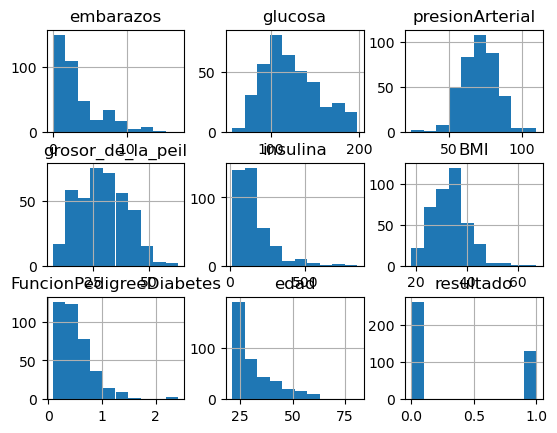

In [18]:
#Grafico de Histograma
plt.figure(figsize=(12,6))
df5.hist()

**MODELOS**

In [19]:
#Separando los datos para entrenar y testear
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test  = train_test_split(df5[["embarazos","glucosa","presionArterial","grosor_de_la_peil","insulina","BMI","FuncionPedigreeDiabetes","edad"]], df5.resultado, random_state= 42, test_size= 0.2)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

#caracteristicas = ["embarazos","glucosa","presionArterial","grosor_de_la_peil","insulina","BMI","FuncionPedigreeDiabetes","edad"]
#x_train = df5[caracteristicas]
#y_train = df5["resultado"]

print(f"Tamaño de Y:{y_train.shape}\nTamaño de X: {x_train.shape}")

Tamaño de Y:(313,)
Tamaño de X: (313, 8)


In [21]:
# Modelo logistico 1
logit = LogisticRegression()
logit.fit(x_train,y_train)

print(f"Intercepto: {logit.intercept_}")
print(f"Coeficientes: {logit.coef_}")

Intercepto: [-7.11100935]
Coeficientes: [[ 8.76149602e-02  3.04209305e-02 -6.81231829e-03  2.57082306e-02
   1.60561816e-03  6.57231478e-03  2.02071944e+00  1.30898289e-02]]


C:\Users\GUSTAVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
# Modelo logistico 2
x2_train, x2_test, y2_train, y2_test  = train_test_split(df5[["glucosa","BMI","FuncionPedigreeDiabetes","edad"]], df5.resultado, random_state= 42, test_size= 0.2)
#caract = ["BMI", "edad", "FuncionPedigreeDiabetes", "glucosa"]
#x2_train = df5[caract]

logit2 = LogisticRegression()
logit2.fit(x2_train,y2_train)

print(f"Intercepto: {logit2.intercept_}")
print(f"Coeficientes: {logit2.coef_}")

Intercepto: [-10.20748657]
Coeficientes: [[0.0391602  0.07126871 0.94231797 0.04943482]]


In [23]:
# Modelo Arbol de Decision 1
a_decision = DecisionTreeClassifier()
a_decision.fit(x_train,y_train)

print(f"Profundidad del árbol: {a_decision.get_depth()}")
print(f"Número de nodos terminales: {a_decision.get_n_leaves()}")

Profundidad del árbol: 11
Número de nodos terminales: 48


In [24]:
# Modelo Arbol de Decision 2
a_decision2 = DecisionTreeClassifier()
a_decision2.fit(x2_train,y2_train)

print(f"Profundidad del árbol: {a_decision2.get_depth()}")
print(f"Número de nodos terminales: {a_decision2.get_n_leaves()}")

Profundidad del árbol: 12
Número de nodos terminales: 61


EVALUANDO LOS MODELOS

In [25]:
from sklearn.metrics import plot_confusion_matrix

def m_confusion(modelo):
    disp = plot_confusion_matrix(modelo, x_train, y_train,
                                cmap = plt.cm.Blues, values_format = "d")
    true_pred = disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]
    total_data = np.sum(disp.confusion_matrix)
    accuracy = true_pred/total_data
    print(f"Accuracy: {np.round(accuracy,4)}")
    plt.show()

Accuracy: 0.7859


C:\Users\GUSTAVO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


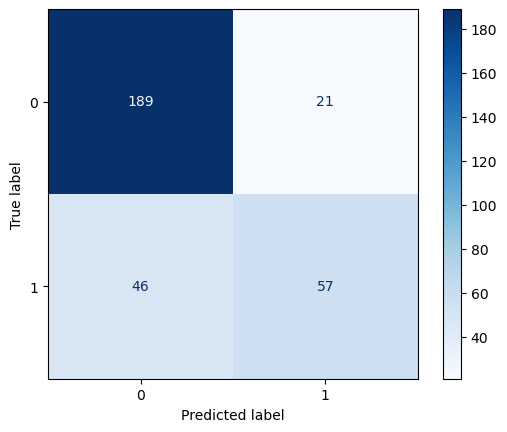

In [26]:
m_confusion(logit)

Accuracy: 1.0


C:\Users\GUSTAVO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


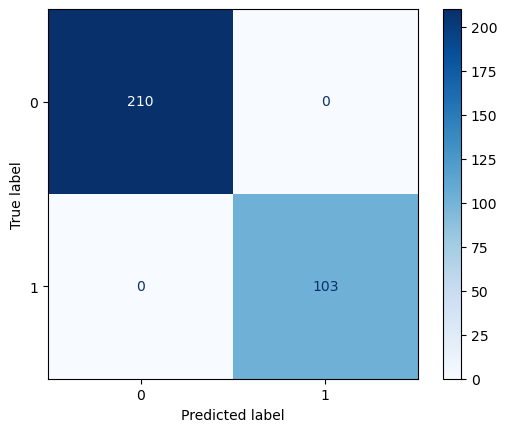

In [27]:
m_confusion(a_decision)

In [28]:
# Evaluando los Segundos modelos, con menos variables
def m_confusion2(modelo):
    disp = plot_confusion_matrix(modelo, x2_train, y2_train,
                                cmap = plt.cm.Blues, values_format = "d")
    true_pred = disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]
    total_data = np.sum(disp.confusion_matrix)
    accuracy = true_pred/total_data
    print(f"Accuracy: {np.round(accuracy,4)}")
    plt.show()

Accuracy: 0.8019


C:\Users\GUSTAVO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


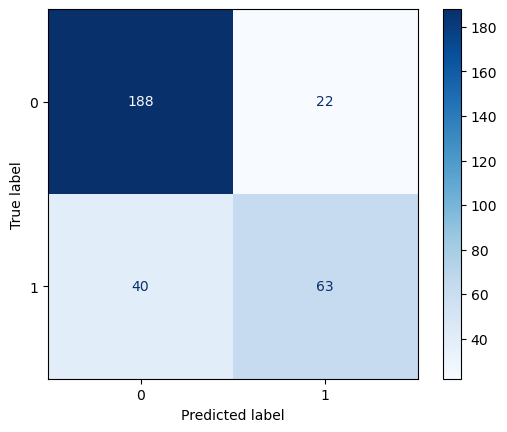

In [29]:
m_confusion2(logit2)

Accuracy: 1.0


C:\Users\GUSTAVO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


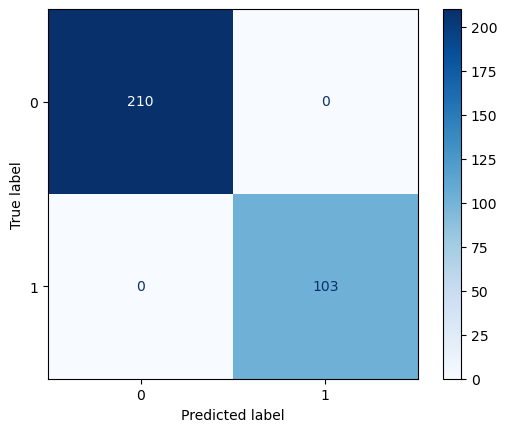

In [30]:
m_confusion2(a_decision2)

Podemos observar que nuestro modelo logit 2, tiene una mayor precisión que el primero, al excluir 4 variables.  
Por otro lado, nuestro modelo de Arbol de Decisión, en ambos modelos tienen una alta precisión.

In [32]:
#Comparando los resultados con TEST para modelos LOGIT
print("Score del modelo logit1 con datos TEST",logit.score(x_test,y_test))
print("Score del modelo logit2 con datos TEST",logit2.score(x2_test,y2_test))

Score del modelo logit1 con datos TEST 0.7848101265822784
Score del modelo logit2 con datos TEST 0.7468354430379747


Vemos que el primer modelo tiene mayor precisión que el segundo modelo.

In [34]:
#Comparando los resultados con TEST para modelos ARBOLES DE DECISION
print("Score del modelo Arbol de Decision 1 con datos TEST",a_decision.score(x_test,y_test))
print("Score del modelo Arbol de Decision 2 con datos TEST",a_decision2.score(x2_test,y2_test))

Score del modelo Arbol de Decision 1 con datos TEST 0.7215189873417721
Score del modelo Arbol de Decision 2 con datos TEST 0.7341772151898734


Vemos que el Segundo modelo de Arbol de Decisión tiene mayor precisión con los datos de TEST

#### Segun los modelos realizados, el primer modelo logit realizado, tiene mayor precisión que los demas, realizando la prueba con los datos de TEST, es por eso, que tomaremos este modelo para la predicciones de la Diabetes.

**Muchas Gracias**